# Regularyzacja w modelu regresji - zbiór `Hitter`

In [2]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

from scipy import stats

# Zadanie - `Hitter`

Zbiór `Hitter` (pakiet `ISLR`) zawiera dane z **Major League Baseball** z sezonu 1986 i 1987, zawierają 322 obserwacje na temat głównych zawodników scharakteryzowanym na podstawie następujących zmiennych: 

``AtBat``
   Number of times at bat in 1986

``Hits``
   Number of hits in 1986

``HmRun``
   Number of home runs in 1986

``Runs``
   Number of runs in 1986

``RBI``
   Number of runs batted in in 1986

``Walks``
   Number of walks in 1986

``Years``
   Number of years in the major leagues

``CAtBat``
   Number of times at bat during his career

``CHits``
   Number of hits during his career

``CHmRun``
   Number of home runs during his career

``CRuns``
   Number of runs during his career

``CRBI``
   Number of runs batted in during his career

``CWalks``
   Number of walks during his career

``League``
   A factor with levels ``A`` and ``N`` indicating player's league at
   the end of 1986

``Division``
   A factor with levels ``E`` and ``W`` indicating player's division at
   the end of 1986

``PutOuts``
   Number of put outs in 1986

``Assists``
   Number of assists in 1986

``Errors``
   Number of errors in 1986

``Salary``
   1987 annual salary on opening day in thousands of dollars

``NewLeague``
   A factor with levels ``A`` and ``N`` indicating player's league at
   the beginning of 1987

1. Dopasuj model regresji liniowej, w którym zmienną zależną jest zmienna `Salary` a pozostałe cechy zmiennymi niezależnymi.
Wyznacz ocenę dopasowania modelu korzystając z kroswalidacji 10-krotnej dla następujących miar:
   - błędu średniokwadratowego, 
   - mediany błędu bezwzględnego, 
   - wspóczynnik determinacji $R^2$.
    
    
2. Dopasuj model regresji grzbietowej:

   a) dla dowolnie wybranego parametru $\alpha$ i wyznacz ocenę doapsowania modelu przy użyciu kroswalidacji 10-krotnej dla błędu średniokwadratowego, mediany błędu bezwzględnego, i wspóczynnik determinacji $R^2$.
   
   b) znajdź optymalną wartość parametru $\alpha$ (`GridSearchCV`)
   
   c) sporządź wykres wartości współczynników regresji względem parametru $\alpha$.
   

3. Dopasuj model regresji Lasso:

   a) dla dowolnie wybranego parametru $\alpha$ i wyznacz ocenę doapsowania modelu przy użyciu kroswalidacji 10-krotnej dla błędu średniokwadratowego, mediany błędu bezwzględnego, i wspóczynnik determinacji $R^2$.
   
   b) znajdź optymalną wartość parametru $\alpha$ (`GridSearchCV`)
   
   c) sporządź wykres wartości współczynników regresji względem parametru $\alpha$.

In [8]:
hitters = sm.datasets.get_rdataset(dataname="Hitters", package="ISLR", cache=True)
# print(hitters.__doc__)

In [4]:
hitters.data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [5]:
hitters.data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 52.8+ KB


In [9]:
hitters = hitters.data.dropna()
hitters = hitters.drop(['League', 'Division', 'NewLeague'], axis = 1)

In [10]:
## Podział zbioru na zmienne niezależne i zmienną zależną
X, y = hitters.iloc[:, hitters.columns != 'Salary'], hitters['Salary']

In [11]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
?cross_val_score

In [14]:
mse = -cross_val_score(estimator=model_linear_regression, X=X, y=y, scoring='neg_mean_squared_error', cv=10).mean()
mae = -cross_val_score(estimator=model_linear_regression, X=X, y=y, scoring='neg_median_absolute_error', cv=10).mean()
r2 = cross_val_score(estimator=model_linear_regression, X=X, y=y, scoring='r2', cv=10).mean()

results_linear_regression = {}
results_linear_regression['mse'] = mse
results_linear_regression['mae'] = mae
results_linear_regression['r2'] = r2

In [15]:
results_linear_regression

{'mse': 118756.28241460052,
 'mae': 173.2156746179618,
 'r2': 0.32613092426075657}

In [ ]:
# Regresja z regularyzacja Ridge

In [16]:
model_ridge_regression = make_pipeline(
    StandardScaler(), 
    Ridge(alpha=1)
)

In [17]:
def cv_model(model, X, y):
    mse = -cross_val_score(estimator=model, X=X, y=y, scoring='neg_mean_squared_error', cv=10).mean()
    mae = -cross_val_score(estimator=model, X=X, y=y, scoring='neg_median_absolute_error', cv=10).mean()
    r2 = cross_val_score(estimator=model, X=X, y=y, scoring='r2', cv=10).mean()

    results = {}
    results['mse'] = mse
    results['mae'] = mae
    results['r2'] = r2
    return results

In [18]:
cv_model(model_ridge_regression, X, y)

{'mse': 116844.60179824212,
 'mae': 163.95230776776862,
 'r2': 0.3417302572516192}

In [ ]:
model_ridge_regression = make_pipeline(
    StandardScaler(), 
    Ridge(alpha=1)
)

# `Gridsearch`

In [19]:
?GridSearchCV

In [25]:
estimator_ridge = make_pipeline(
    StandardScaler(), 
    Ridge()
)


grid = GridSearchCV(
    estimator=estimator_ridge, 
    param_grid = {'ridge__alpha': np.linspace(0.01, 10, 100)},
    scoring='neg_mean_squared_error',
    cv=10
)
grid.fit(X, y)

/opt/anaconda3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'ridge...
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.284

In [26]:
grid.best_params_

{'ridge__alpha': 1.7254545454545454}

In [29]:
-grid.best_score_

116555.07494003672

In [27]:
grid.best_estimator_ # Ridge(alpha=grid.best_params_)

# ridge = make_pipeline(
#     StandardScaler(), 
#     Ridge(alpha=grid.best_estimator_)
# )

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=1.7254545454545454, copy_X=True,
                       fit_intercept=True, max_iter=None, normalize=False,
                       random_state=None, solver='auto', tol=0.001))],
         verbose=False)

In [28]:
cv_model(grid.best_estimator_, X, y)

{'mse': 116736.28278658181,
 'mae': 161.19027622652226,
 'r2': 0.3455867614454575}

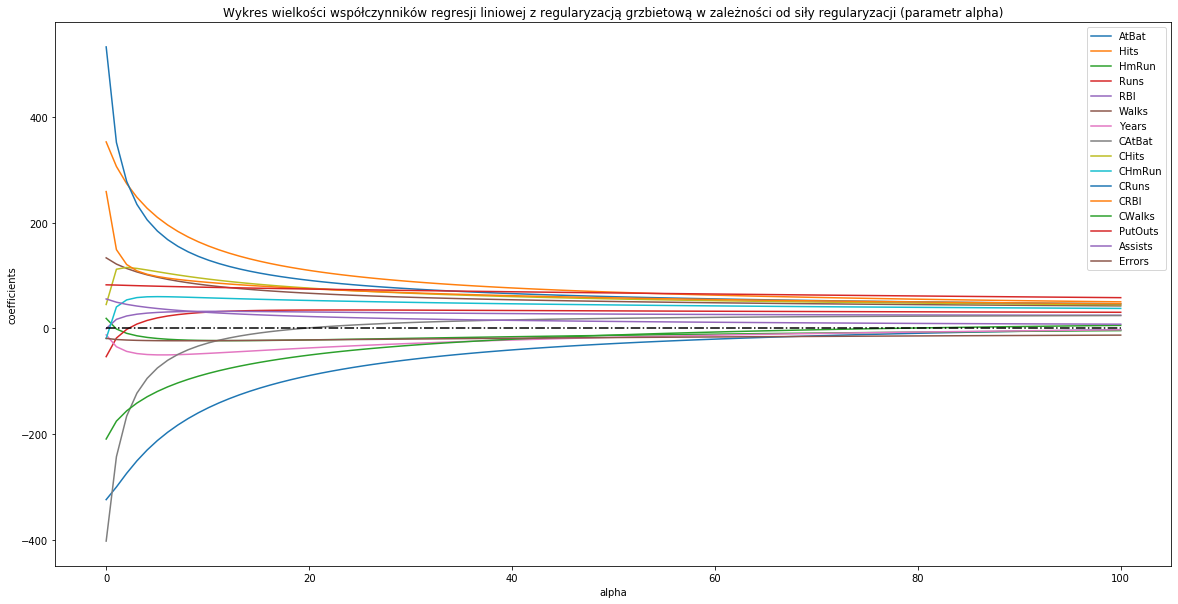

In [35]:
#2c
plt.figure(figsize=(20, 10))

alpha_vec =  np.linspace(0, 100, 100)

coefs = []
for a in alpha_vec:
    model_ridge_regression = make_pipeline(
        StandardScaler(),
        Ridge(alpha = a)
    )
    model_ridge_regression.fit(X, y)
    coefs.append(model_ridge_regression.named_steps['ridge'].coef_)


plt.plot(alpha_vec, coefs)
plt.plot([np.min(alpha_vec), np.max(alpha_vec)], [0, 0], '-.', color = 'black')
plt.title('Wykres wielkości współczynników regresji liniowej z regularyzacją grzbietową w zależności od siły regularyzacji (parametr alpha)')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.legend(X.columns)
plt.show()

## Regresja wielomianowa z regularyzacją

In [37]:
poly_ridge_estimator = make_pipeline(
    PolynomialFeatures(),
    StandardScaler(),
    Ridge()
)
poly_ridge_estimator

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
grid2 = GridSearchCV(
    estimator=poly_ridge_estimator,
    param_grid={
        'polynomialfeatures__degree': [1, 2, 3, 4, 5],
        'ridge__alpha': np.linspace(0, 1, 10)
    },
    scoring='neg_mean_squared_error',
    cv=10
)

grid2.fit(X, y)

/opt/anaconda3.7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/opt/anaconda3.7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/opt/anaconda3.7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/opt/anaconda3.7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/opt/anaconda3.7/lib/python3.7/site-packages/skl

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
        

In [41]:
grid2.best_params_

{'polynomialfeatures__degree': 2, 'ridge__alpha': 0.8888888888888888}

In [43]:
cv_model(grid2.best_estimator_, X, y)

{'mse': 89146.61655079047,
 'mae': 132.55750705041766,
 'r2': 0.49692141640971876}

## Lasso

In [46]:
poly_lasso_estimator = make_pipeline(
    PolynomialFeatures(),
    StandardScaler(),
    Lasso(max_iter=1e3)
)
poly_lasso_estimator

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000.0, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [48]:
grid3 = GridSearchCV(
    estimator=poly_lasso_estimator,
    param_grid={
        'polynomialfeatures__degree': [1, 2, 3],
        'lasso__alpha': np.linspace(0, 1, 10)
    },
    scoring='neg_mean_squared_error',
    cv=10
)

grid3.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lasso',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True,
                                              max_iter=1000.0, normalize=Fa...
       

In [49]:
grid3.best_params_

{'lasso__alpha': 0.6666666666666666, 'polynomialfeatures__degree': 2}

In [50]:
cv_model(grid3.best_estimator_, X, y)

{'mse': 97241.68199458001,
 'mae': 129.95296084818884,
 'r2': 0.44419460251904247}

In [69]:
# Zapis modelu do pliku

In [51]:
import pickle

In [60]:
?pickle.dump

In [62]:
pickle.dump(grid3, open('../grid3.pickle', 'wb'))

In [64]:
?pickle.load

In [67]:
grid4 = pickle.load(open('../grid3.pickle', 'rb'))

In [68]:
cv_model(grid4.best_estimator_, X, y)

{'mse': 97241.68199458001,
 'mae': 129.95296084818884,
 'r2': 0.44419460251904247}

In [71]:
def my_grid_search(estimator, params_grid, scoring='neg_mean_squared_error', cv=10):
    grid = GridSearchCV(
        estimator=estimator,
        param_grid=params_grid,
        scoring=scoring,
        cv=cv
    )

    grid.fit(X, y)
    return grid

In [72]:
params = {
        'polynomialfeatures__degree': [1, 2, 3],
        'lasso__alpha': np.linspace(0, 1, 10)
    }

my_grid_search(poly_lasso_estimator, params, 'r2')

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lasso',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True,
                                              max_iter=1000.0, normalize=Fa...
       